In [70]:
import pod5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12
from tqdm import tqdm
import sys
import random
from scipy import stats
from scipy.signal import find_peaks
sys.path.insert(0, '/private/groups/brookslab/gabai/tools/NEMO/src/')
import importlib
from predict import *
from plot import *
importlib.reload(sys.modules['predict'])
importlib.reload(sys.modules['plot'])

<module 'plot' from '/private/groups/brookslab/gabai/tools/NEMO/src/plot.py'>

In [71]:
fig_outpath = '../figures/manuscript_figures/'
dt_outpath = '../figures/'

## Figure2 C, D, E, F

In [90]:
kmerpeaks = {}
for line in open('../data/uncalled_eventalign/220308_ang_500_sig_dist_precalculated_hist.tsv'):
    line = line.rstrip().split('\t')
    hist = [float(x) for x in line[1].split(',')]
    if line[0] not in kmerpeaks: kmerpeaks[line[0]] = [hist]
    else: kmerpeaks[line[0]].append(hist)
for line in open('../data/uncalled_eventalign/220308_ang_0_sig_dist_precalculated_hist.tsv'):
    line = line.rstrip().split('\t')
    hist = [float(x) for x in line[1].split(',')]
    if line[0] not in kmerpeaks: kmerpeaks[line[0]] = [hist]
    else: kmerpeaks[line[0]].append(hist)

2 1


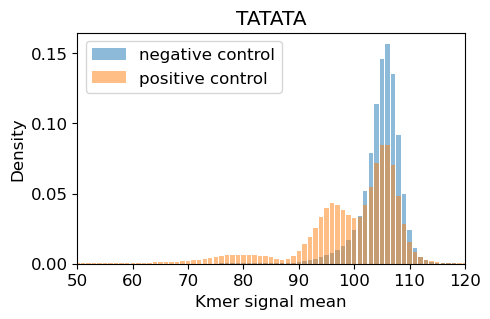

In [242]:
kmer = 'TATATA'
pos, neg = kmerpeaks[kmer]
pospeaks, _ = find_peaks(pos, prominence=0.005, distance=5)
negpeaks, _ = find_peaks(neg, prominence=0.005, distance=5)
plt.figure(figsize=(5, 3))
print(len(pospeaks), len(negpeaks))
# plt.plot([x+25 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks', color='tab:blue')
# plt.plot([x+25 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks', color='tab:orange')
plt.bar(range(25,149), neg, width=0.8, label="negative control", alpha=0.5, color='tab:blue')
plt.bar(range(25, 149), pos, width=0.8, label="positive control", alpha=0.5, color='tab:orange')
plt.xlim(50, 120)
plt.xlabel('Kmer signal mean')
plt.ylabel('Density')
plt.title(kmer)
plt.legend()
plt.savefig(fig_outpath+ 'Figure1C.pdf', bbox_inches='tight')

2 1


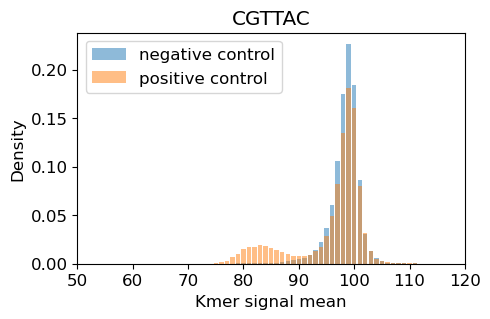

In [243]:
kmer = 'CGTTAC'
pos, neg = kmerpeaks[kmer]
pospeaks, _ = find_peaks(pos, prominence=0.005, distance=5)
negpeaks, _ = find_peaks(neg, prominence=0.005, distance=5)
plt.figure(figsize=(5, 3))
print(len(pospeaks), len(negpeaks))
# plt.plot([x+25 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks', color='tab:blue')
# plt.plot([x+25 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks', color='tab:orange')
plt.bar(range(25,149), neg, width=0.8, label="negative control", alpha=0.5, color='tab:blue')
plt.bar(range(25, 149), pos, width=0.8, label="positive control", alpha=0.5, color='tab:orange')
plt.xlim(50, 120)
plt.xlabel('Kmer signal mean')
plt.ylabel('Density')
plt.title(kmer)
plt.legend()
plt.savefig(fig_outpath+ 'Figure1D.pdf', bbox_inches='tight')

1 1


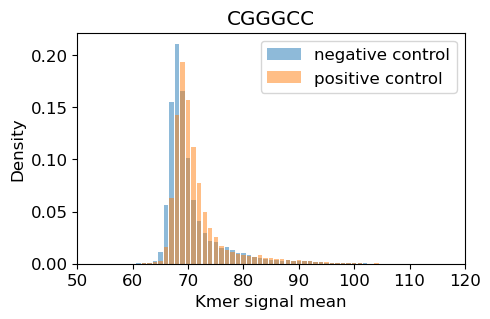

In [244]:
kmer = 'CGGGCC'
pos, neg = kmerpeaks[kmer]
pospeaks, _ = find_peaks(pos, prominence=0.005, distance=5)
negpeaks, _ = find_peaks(neg, prominence=0.005, distance=5)
plt.figure(figsize=(5, 3))
print(len(pospeaks), len(negpeaks))
# plt.plot([x+25 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks', color='tab:blue')
# plt.plot([x+25 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks', color='tab:orange')
plt.bar(range(25,149), neg, width=0.8, label="negative control", alpha=0.5, color='tab:blue')
plt.bar(range(25, 149), pos, width=0.8, label="positive control", alpha=0.5, color='tab:orange')
plt.xlim(50, 120)
plt.xlabel('Kmer signal mean')
plt.ylabel('Density')
plt.title(kmer)
plt.legend()
plt.savefig(fig_outpath+ 'Figure1E.pdf', bbox_inches='tight')

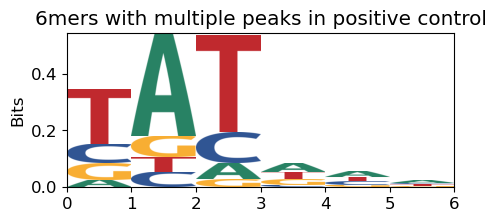

In [128]:
info_kmer = '../data/uncalled_eventalign/5_500_angelicin_informative_kmers.tsv'
non_info_kmer = '../data/uncalled_eventalign/5_500_angelicin_non_informative_kmers.tsv'
plotMotiffromFile(info_kmer, seqlen=6, outpath=fig_outpath, figsize=(5,2),
                  prefix = 'Figure1F', title = '6mers with multiple peaks in positive control')

## Figure2 Supplementary

In [208]:
def aggreadqc(bam, max_reads=''):
    readLens, readQuals = [], []
    readCounts = 0
    samfile = pysam.AlignmentFile(bam, "rb")
    for s in tqdm(samfile):
        if s.is_mapped and not s.is_supplementary and not s.is_secondary:
            # aligned read length
            readLens.append(np.log10(s.reference_length+1))
            readQuals.append(np.median(s.query_qualities))
            readCounts+=1
        if max_reads:
            if readCounts > max_reads:
                break
    samfile.close()
    
    return readLens, readQuals, readCounts

In [184]:
# control
neg_nuclei = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_0.sorted.bam'
pos_nuclei_20 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_20.sorted.bam'
pos_nuclei_100 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_100.sorted.bam'
pos_nuclei_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/pod5/220308_ang_500.sorted.bam'

# chrom nuclei
# rep1
nuclei_chrom_190429 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/20190429_chrom.sorted.bam'
# rep2
nuclei_chrom_210615 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/20210615_0802_shelansky_chrom.sorted.bam'
# rep3
chrom_nuclei_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/mapping/220331_Nuclei_Ang500_doradoBasecalled_movesOut.sorted.bam'

# chrom sphe
chrom_sphe_500 = '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/sphe/220524_500Ang_Spheroblast_dorado_movesOut_sorted.bam'

In [209]:
bams = [ neg_nuclei, pos_nuclei_20, pos_nuclei_100, pos_nuclei_500, 
         nuclei_chrom_190429, nuclei_chrom_210615, nuclei_chrom_190429,
         chrom_sphe_500]

labels = ['negative control', '20uM positive control', '100uM positive control', '500uM positive control', 
          'Nuclei rep1', 'Nuclei rep2', 'Nuclei rep3',
          'Spheroplast']


allreadLens, allreadQuals, allreadCounts = [], [], []

for i in range(len(bams)):
    readLens, readQuals, readCounts = aggreadqc(bams[i])
    allreadLens.append(readLens)
    allreadQuals.append(readQuals)
    allreadCounts.append(readCounts)
    label = labels[i]
    print(f'saving info for sample {label}...')

229052it [00:37, 6032.58it/s] 


saving info for sample negative control...


72505it [00:09, 7403.29it/s] 


saving info for sample 20uM positive control...


65982it [00:09, 6776.19it/s] 


saving info for sample 100uM positive control...


80168it [00:10, 7634.49it/s] 


saving info for sample 500uM positive control...


138544it [00:19, 7163.02it/s] 


saving info for sample Nuclei rep1...


1944505it [01:43, 18799.75it/s]


saving info for sample Nuclei rep2...


138544it [00:19, 7162.86it/s] 


saving info for sample Nuclei rep3...


44022it [00:15, 2846.22it/s]

saving info for sample Spheroplast...


In [211]:
outf = open(dt_outpath + 'Figure2_supp_read_qc.tsv', 'w')
outf.write('sample\treadlength_mean\treadlength_median\treadlength_std\treadquality_mean\treadquality_median\treadquality_std\tnreads\n')

for i in range(len(bams)):
    label = labels[i]
    outf.write(f'{label}\t{np.mean(allreadLens[i])}\t{np.median(allreadLens[i])}\t{np.std(allreadLens[i])}\t{np.mean(allreadQuals[i])}\t{np.median(allreadQuals[i])}\t{np.std(allreadQuals[i])}\t{allreadCounts[i]}\n')
outf.close()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 31.32it/s]


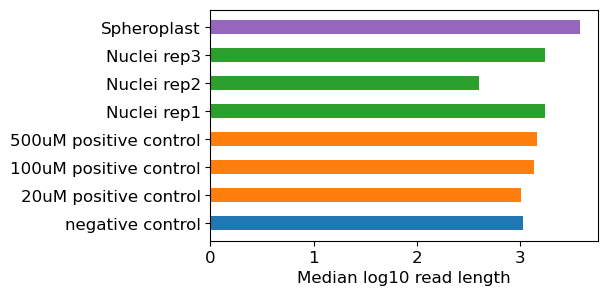

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 47.52it/s]


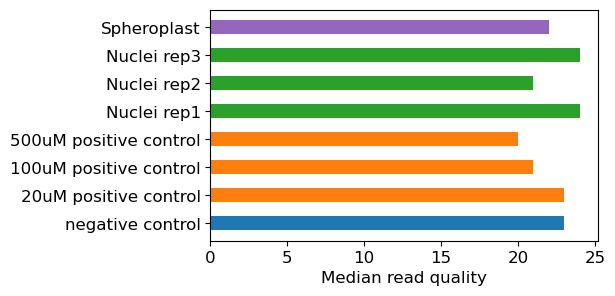

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 328.96it/s]


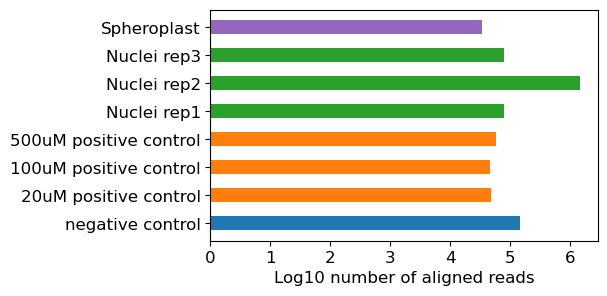

In [277]:
colors = ['tab:blue', 'tab:orange', 'tab:orange', 'tab:orange', 'tab:green', 'tab:green', 'tab:green', 'tab:purple']

plt.figure(figsize=(5, 3))
for i in tqdm(range(len(allreadLens))):
     plt.barh(i, np.median(allreadLens[i]), height=0.5, color=colors[i])
plt.yticks(np.arange(0, len(allreadLens)), labels)
plt.xlabel('Median log10 read length')
plt.savefig(fig_outpath+ 'Supp_Figure2C.pdf', bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(5, 3))
for i in tqdm(range(len(allreadQuals))):
     plt.barh(i, np.median(allreadQuals[i]), height=0.5, color=colors[i])

plt.yticks(np.arange(0, len(allreadQuals)), labels)
plt.xlabel('Median read quality')
plt.savefig(fig_outpath+ 'Supp_Figure2D.pdf', bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(5, 3))
for i in tqdm(range(len(allreadCounts))):
     plt.barh(i, np.log10(allreadCounts[i]), height=0.5, color=colors[i])

plt.yticks(np.arange(0, len(allreadCounts)), labels)
plt.xlabel('Log10 number of aligned reads')
plt.savefig(fig_outpath+ 'Supp_Figure2E.pdf', bbox_inches='tight')
plt.show()
plt.close()

1 1


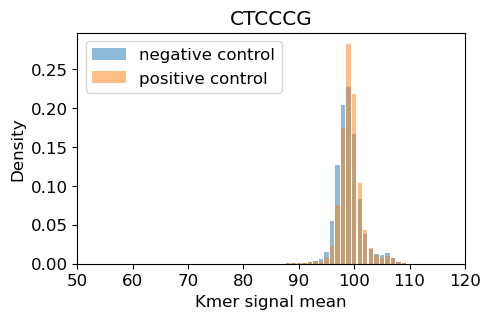

In [248]:
kmer = 'CTCCCG'
pos, neg = kmerpeaks[kmer]
pospeaks, _ = find_peaks(pos, prominence=0.005, distance=5)
negpeaks, _ = find_peaks(neg, prominence=0.005, distance=5)
plt.figure(figsize=(5, 3))
print(len(pospeaks), len(negpeaks))
# plt.plot([x+25 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks', color='tab:blue')
# plt.plot([x+25 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks', color='tab:orange')
plt.bar(range(25,149), neg, width=0.8, label="negative control", alpha=0.5, color='tab:blue')
plt.bar(range(25, 149), pos, width=0.8, label="positive control", alpha=0.5, color='tab:orange')
plt.xlim(50, 120)
plt.xlabel('Kmer signal mean')
plt.ylabel('Density')
plt.title(kmer)
plt.legend()
plt.savefig(fig_outpath+ 'Supp_Figure2F.pdf', bbox_inches='tight')

1 1


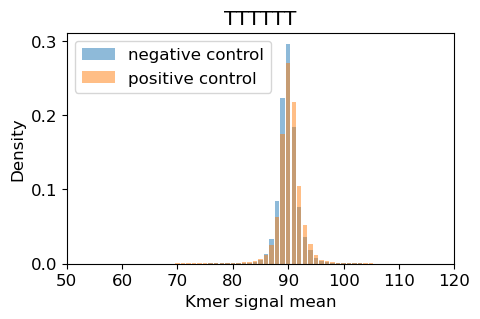

In [249]:
kmer = 'TTTTTT'
pos, neg = kmerpeaks[kmer]
pospeaks, _ = find_peaks(pos, prominence=0.005, distance=5)
negpeaks, _ = find_peaks(neg, prominence=0.005, distance=5)
plt.figure(figsize=(5, 3))
print(len(pospeaks), len(negpeaks))
# plt.plot([x+25 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks', color='tab:blue')
# plt.plot([x+25 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks', color='tab:orange')
plt.bar(range(25,149), neg, width=0.8, label="negative control", alpha=0.5, color='tab:blue')
plt.bar(range(25, 149), pos, width=0.8, label="positive control", alpha=0.5, color='tab:orange')
plt.xlim(50, 120)
plt.xlabel('Kmer signal mean')
plt.ylabel('Density')
plt.title(kmer)
plt.legend()
plt.savefig(fig_outpath+ 'Supp_Figure2G.pdf', bbox_inches='tight')

number of informative kmers:  169
number of informative kmers with TA:  166
number of un-informative kmers:  3927
number of TA containing kmers:  1185
number of non TA containing kmers:  2911
4096


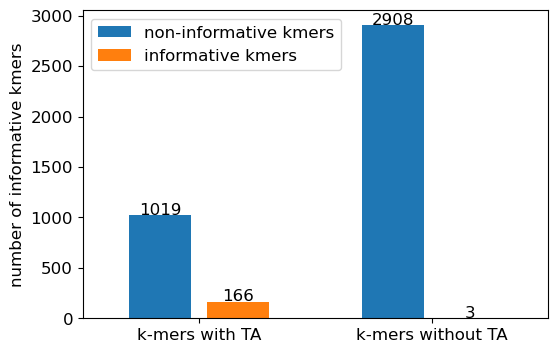

In [129]:
ikmer = []
ikmer_c_TA, ikmer_c_AT, ikmer_c_TG, ikmer_c_GT = 0, 0, 0 ,0
with open(info_kmer, 'r') as infile:
    for line in infile:
        line = line.strip().split('\t')
        ikmer.append(line[0])
        if 'TA' in line[0]:
            ikmer_c_TA+=1
        if 'AT' in line[0]:
            ikmer_c_AT+=1
        if 'TG' in line[0]:
            ikmer_c_TG+=1
        if 'GT' in line[0]:
            ikmer_c_GT+=1

ikmer_c = len(ikmer)
print('number of informative kmers: ', ikmer_c)
print('number of informative kmers with TA: ', ikmer_c_TA)


nonikmer = []
with open(non_info_kmer, 'r') as infile:
    for line in infile:
        line = line.strip().split('\t')
        nonikmer.append(line[0])
print('number of un-informative kmers: ', len(nonikmer))

kmer_c_TA = 0
for kmer in ikmer+nonikmer:
    if 'TA' in kmer:
        kmer_c_TA+=1
print('number of TA containing kmers: ', kmer_c_TA)
print('number of non TA containing kmers: ', 4096-kmer_c_TA)
plt.figure(figsize=(6, 4))

plt.bar(1, [kmer_c_TA-ikmer_c_TA], color= 'tab:blue', label = 'non-informative kmers')
plt.text(1, kmer_c_TA-ikmer_c_TA+5, f'{kmer_c_TA-ikmer_c_TA}', ha = 'center')
plt.bar(2, [ikmer_c_TA], color= 'tab:orange', label = 'informative kmers')
plt.text(2, ikmer_c_TA+5, f'{ikmer_c_TA}', ha = 'center')


plt.bar(4, [4096-kmer_c_TA - (ikmer_c-ikmer_c_TA)], color= 'tab:blue',)
plt.text(4, 4096-kmer_c_TA - (ikmer_c-ikmer_c_TA)+5, f'{4096-kmer_c_TA - (ikmer_c-ikmer_c_TA)}', ha = 'center')
plt.bar(5, [ikmer_c-ikmer_c_TA], color= 'tab:orange',)
plt.text(5, ikmer_c-ikmer_c_TA+5, f'{ikmer_c-ikmer_c_TA}', ha = 'center')

total = 1019+166+2908+3
print(total)
plt.legend()
plt.xlim(0,6)
plt.ylabel('number of informative kmers')
plt.xticks([1.5, 4.5], ['k-mers with TA', 'k-mers without TA'], rotation = 0)
plt.savefig(fig_outpath+ 'Supp_Figure2H.pdf', bbox_inches='tight')
plt.show()

number of informative kmers in 20 ang:  1
number of informative kmers in 500 ang:  55


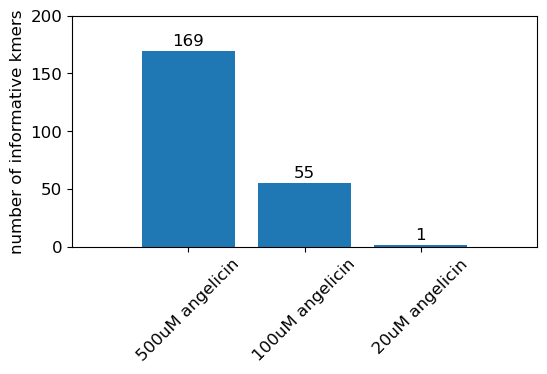

In [270]:
ikmer_20 = []
with open('../data/uncalled_eventalign/5_20_angelicin_informative_kmers.tsv', 'r') as infile:
    for line in infile:
        line = line.strip().split('\t')
        ikmer_20.append(line[0])
print('number of informative kmers in 20 ang: ', len(ikmer_20))

ikmer_100 = []
with open('../data/uncalled_eventalign/5_100_angelicin_informative_kmers.tsv', 'r') as infile:
    for line in infile:
        line = line.strip().split('\t')
        ikmer_100.append(line[0])
print('number of informative kmers in 500 ang: ', len(ikmer_100))

plt.figure(figsize=(6, 3))
plt.bar(1, [len(ikmer)], color= 'tab:blue',)
plt.text(1, len(ikmer)+5, f'{len(ikmer)}', ha = 'center')
plt.bar(2, [len(ikmer_100)], color= 'tab:blue',)
plt.text(2, len(ikmer_100)+5, f'{len(ikmer_100)}', ha = 'center')
plt.bar(3, [len(ikmer_20)], color= 'tab:blue',)
plt.text(3, len(ikmer_20)+5, f'{len(ikmer_20)}', ha = 'center')

plt.xlim(0,4)
plt.ylim(0,200)
plt.ylabel('number of informative kmers')
plt.xticks([1, 2, 3], ['500uM angelicin', '100uM angelicin', '20uM angelicin'], rotation = 45)
plt.savefig(fig_outpath+ 'Supp_Figure2I.pdf', bbox_inches='tight')
plt.show()

<Figure size 600x300 with 0 Axes>

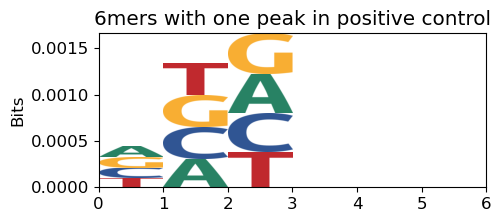

In [121]:
plt.figure(figsize=(6, 3))
plotMotiffromFile(non_info_kmer, seqlen=6, outpath=fig_outpath, figsize=(5,2),
                  prefix = 'Supp_Figure2J', title = '6mers with one peak in positive control')

CCCCCG
CCCGGA
GGCTCG


(0.0, 180.0)

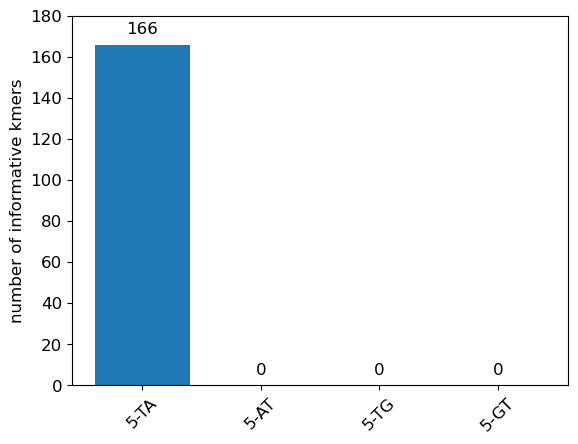

In [131]:
for i, c in enumerate([ikmer_c_TA, ikmer_c_AT, ikmer_c_TG, ikmer_c_GT]):
    plt.bar(i, c)
    plt.text(i, c+5, f'{c}', ha = 'center')
plt.xticks([0,1,2,3], ['5-TA', '5-AT', '5-TG', '5-GT'], rotation = 45)
plt.ylabel('number of informative kmers')
plt.ylim(0, 180)

2 1
2 1
2 1


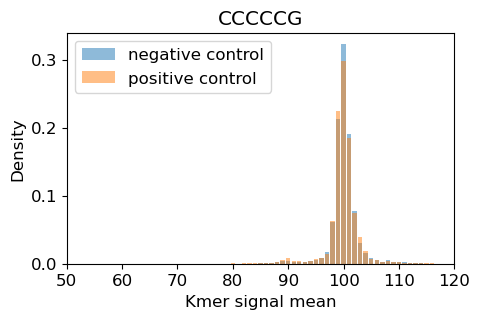

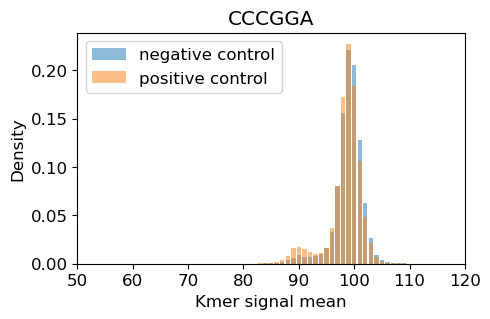

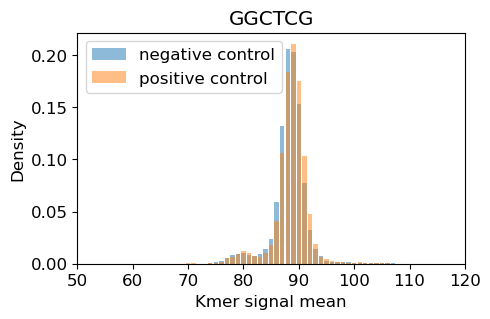

In [132]:
# False positives
for kmer in ['CCCCCG', 'CCCGGA', 'GGCTCG']:
    pos, neg = kmerpeaks[kmer]
    pospeaks, _ = find_peaks(pos, prominence=0.005, distance=5)
    negpeaks, _ = find_peaks(neg, prominence=0.005, distance=5)
    plt.figure(figsize=(5, 3))
    print(len(pospeaks), len(negpeaks))
    # plt.plot([x+25 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks', color='tab:blue')
    # plt.plot([x+25 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks', color='tab:orange')
    plt.bar(range(25,149), neg, width=0.8, label="negative control", alpha=0.5, color='tab:blue')
    plt.bar(range(25, 149), pos, width=0.8, label="positive control", alpha=0.5, color='tab:orange')
    plt.xlim(50, 120)
    plt.xlabel('Kmer signal mean')
    plt.ylabel('Density')
    plt.title(kmer)
    plt.legend()

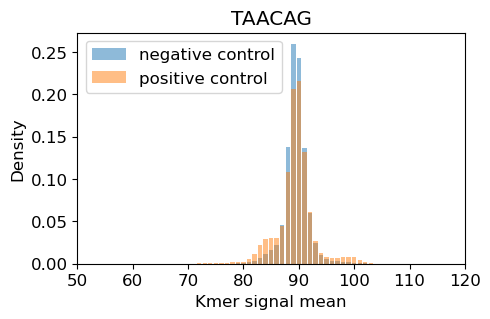

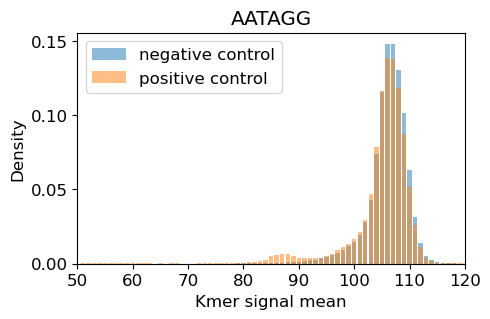

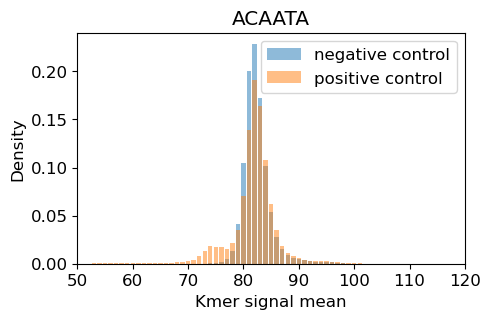

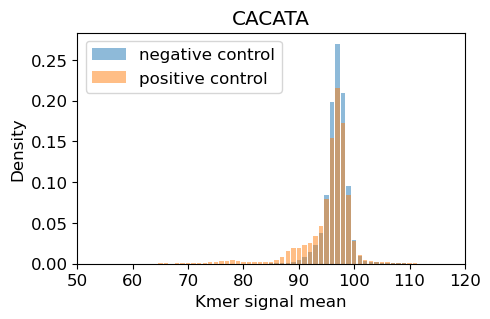

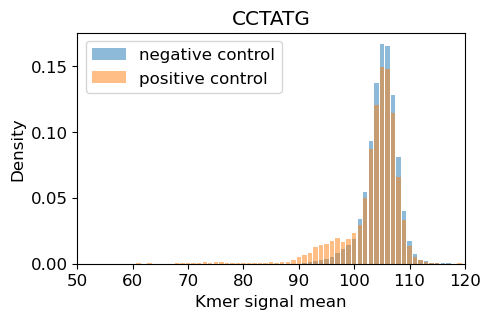

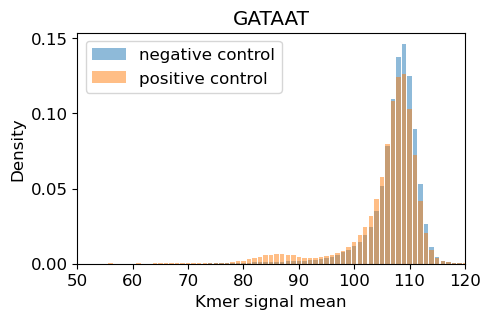

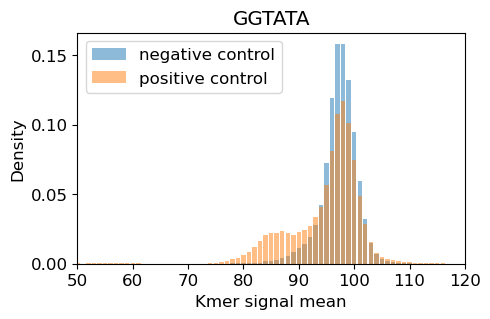

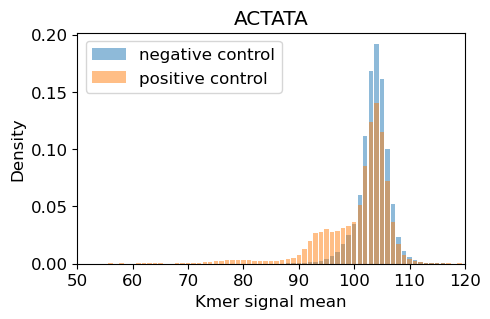

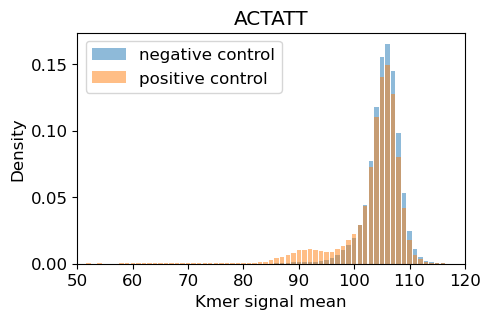

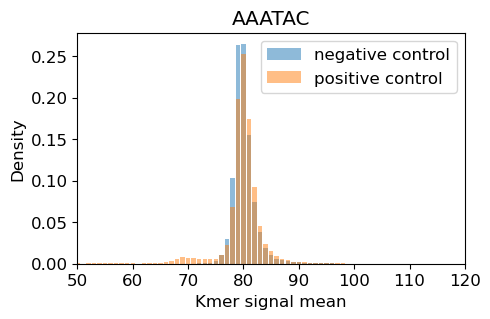

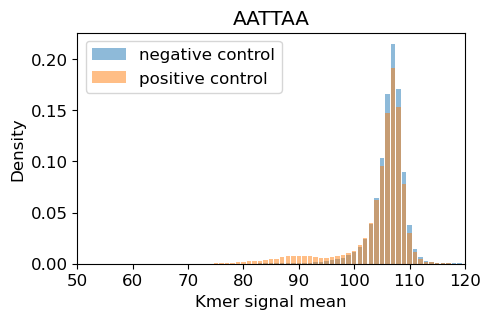

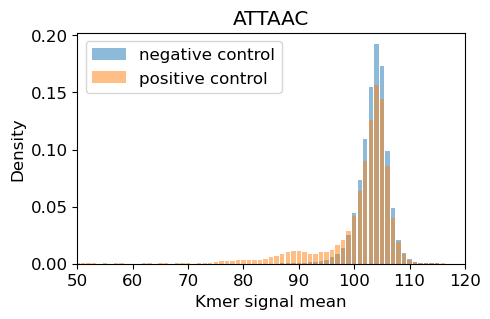

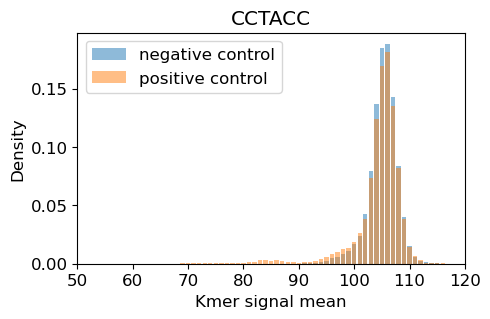

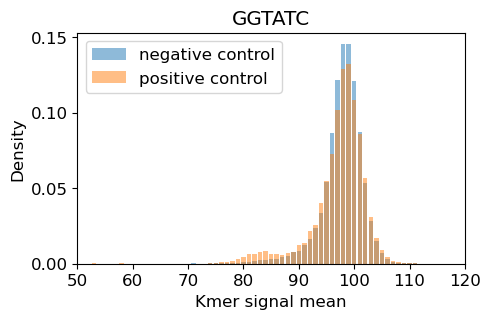

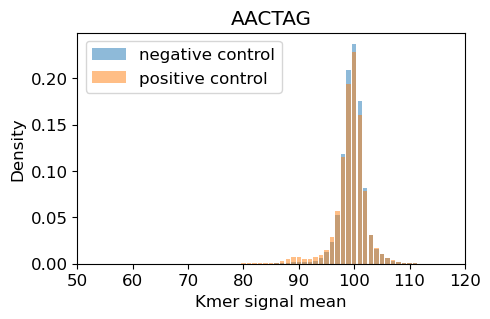

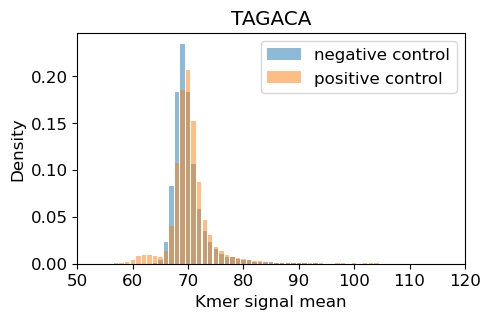

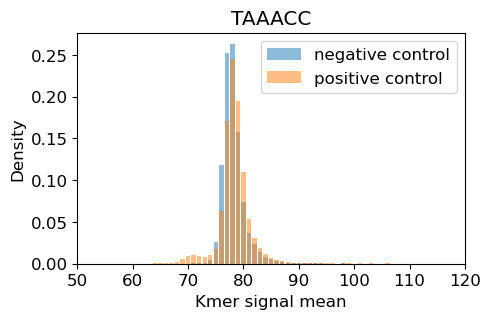

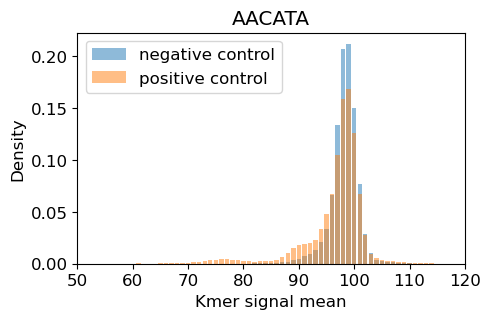

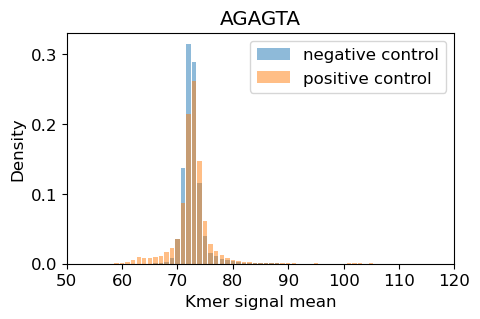

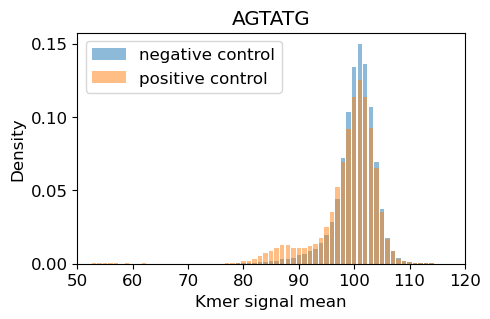

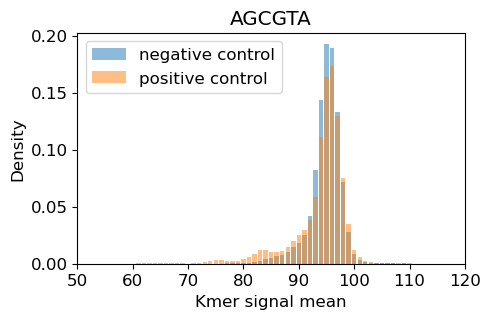

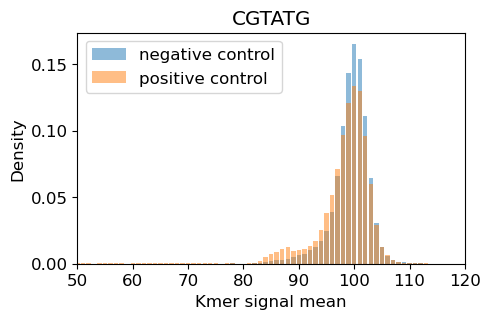

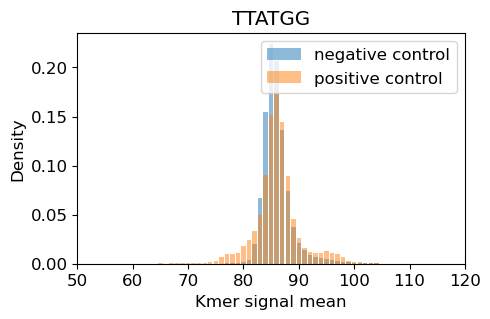

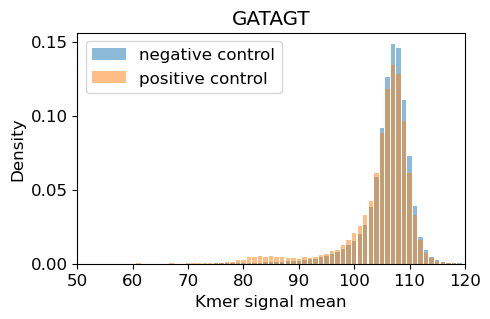

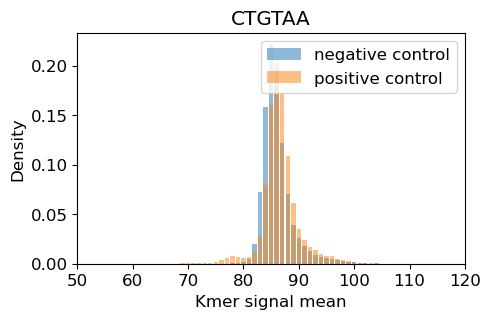

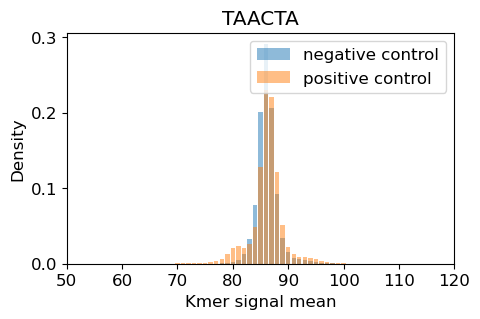

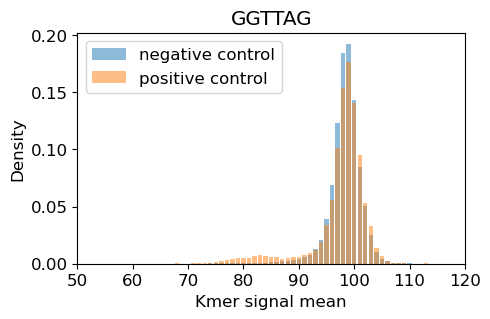

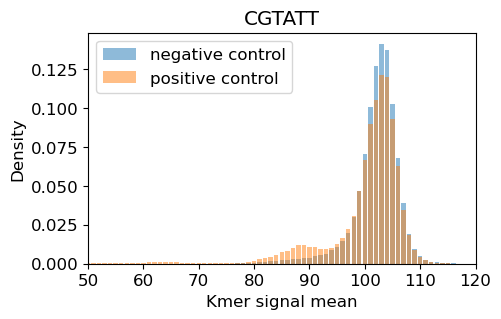

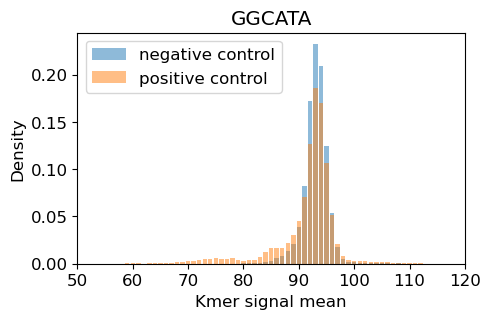

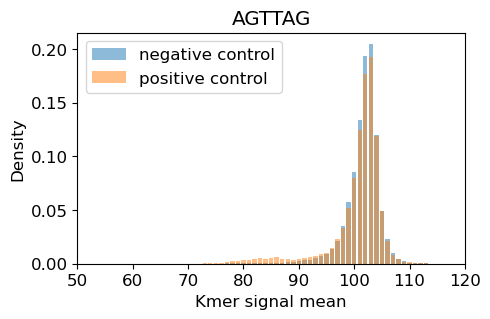

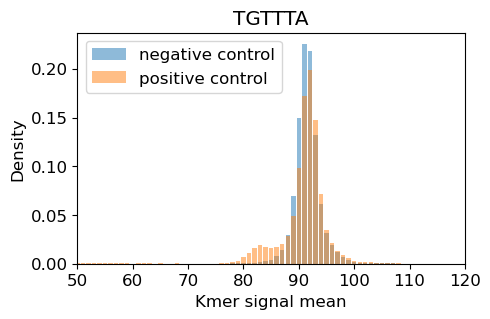

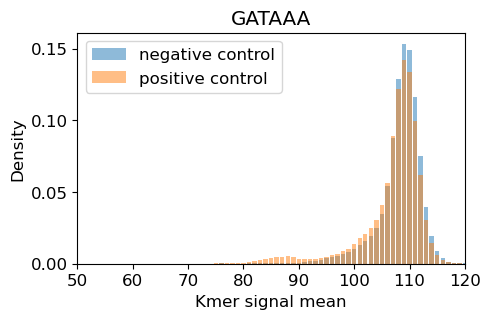

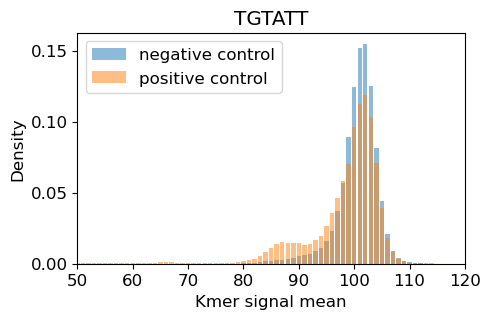

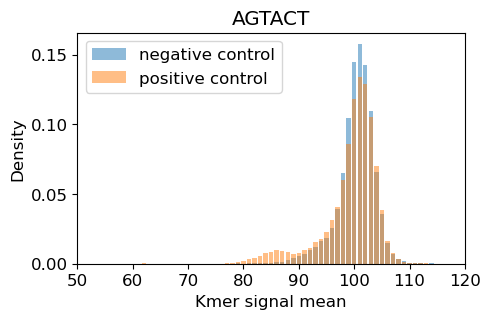

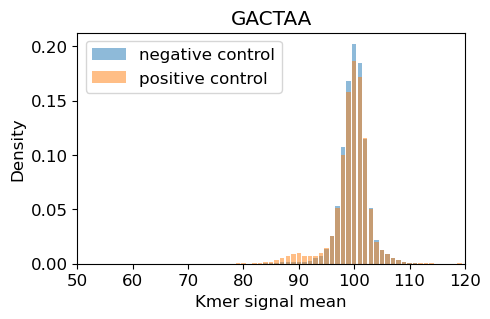

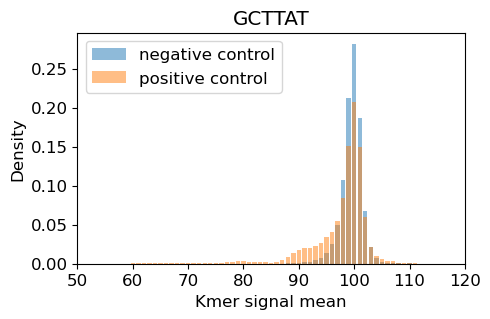

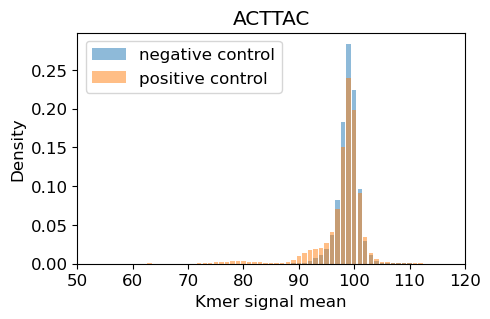

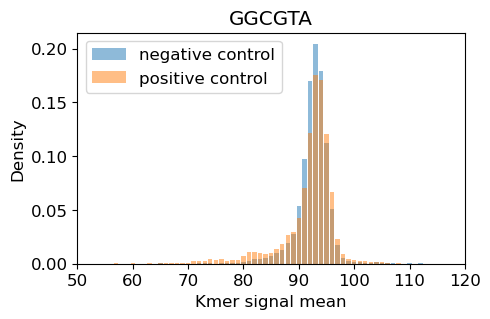

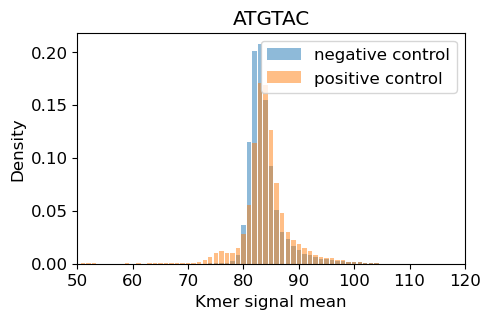

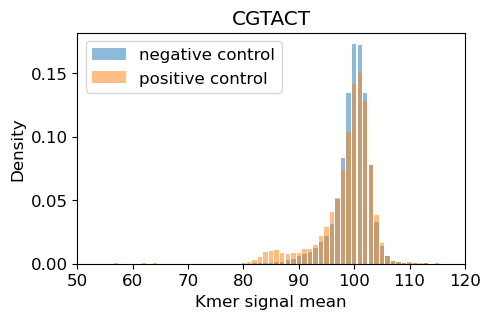

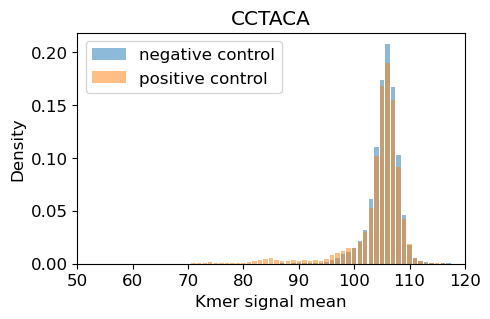

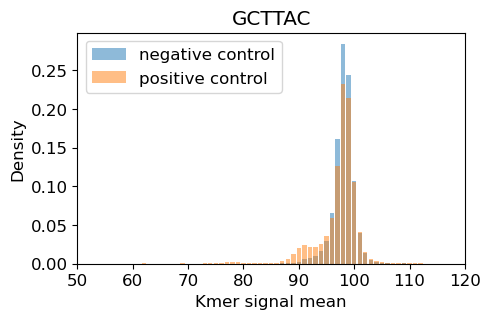

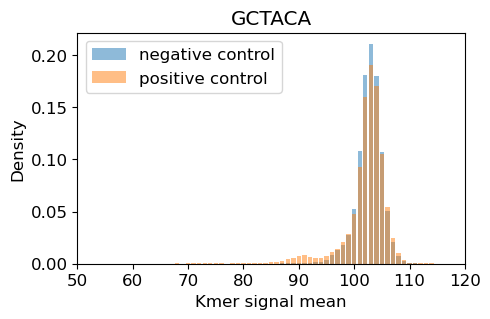

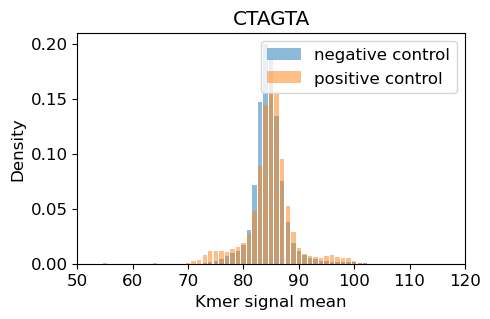

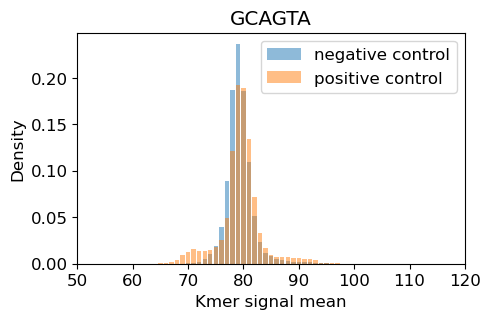

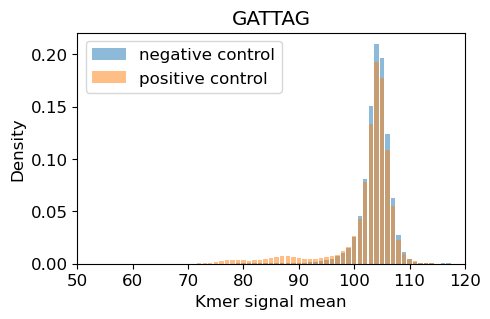

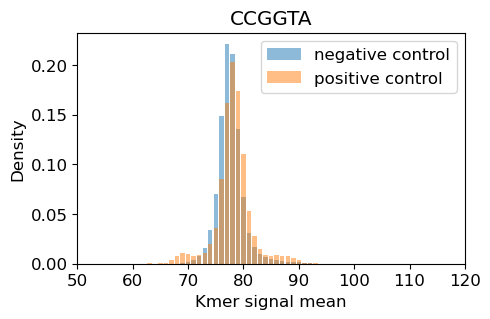

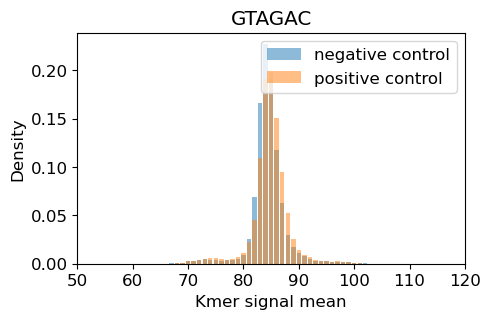

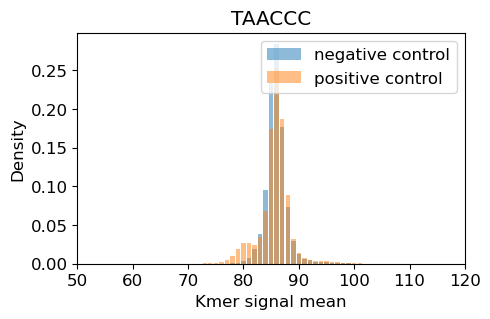

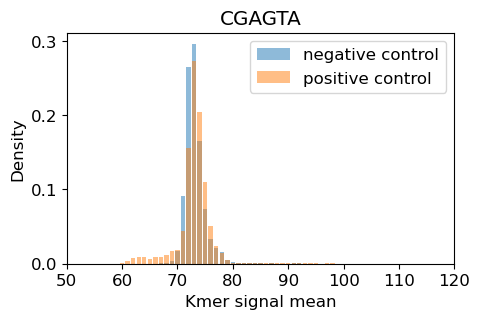

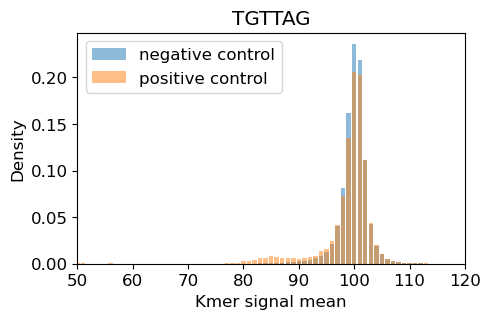

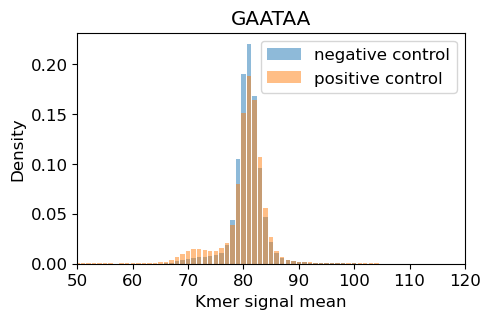

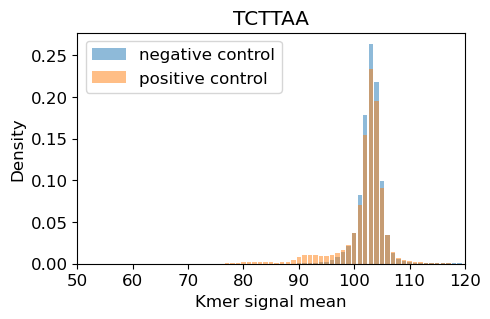

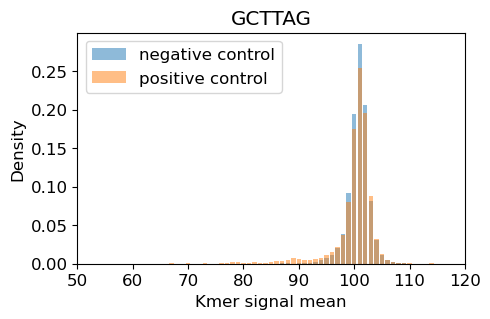

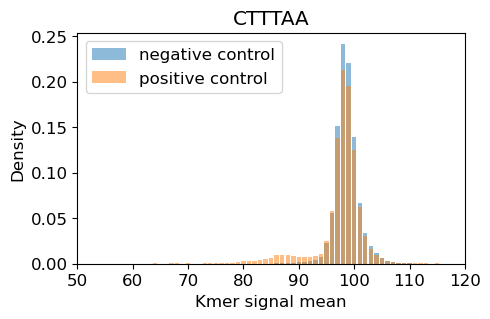

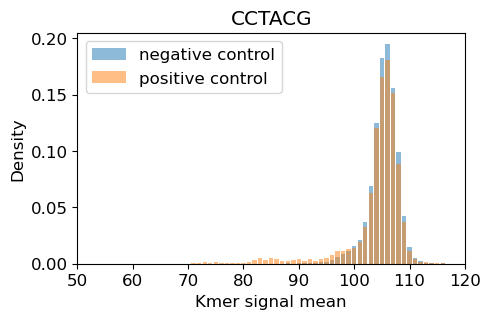

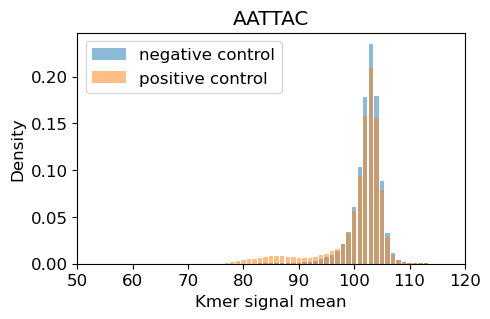

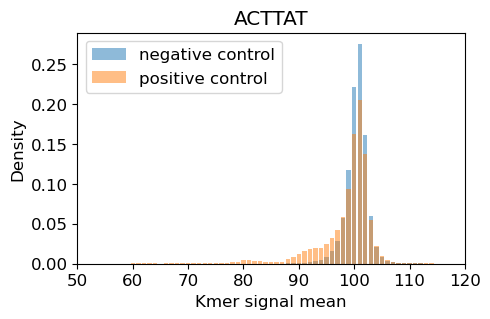

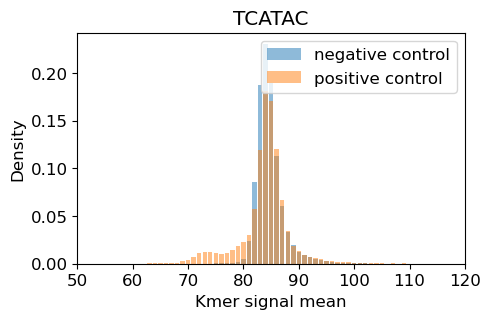

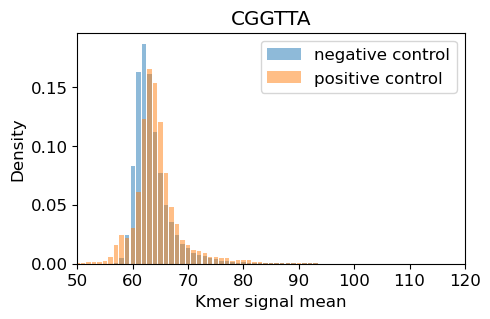

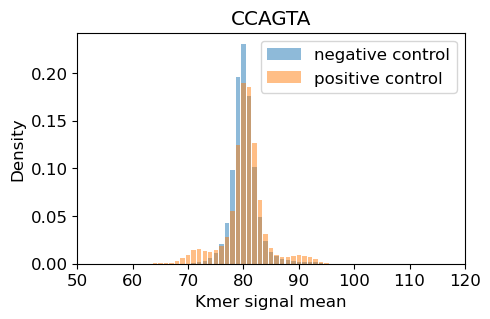

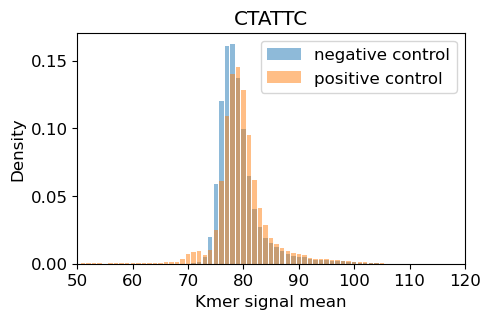

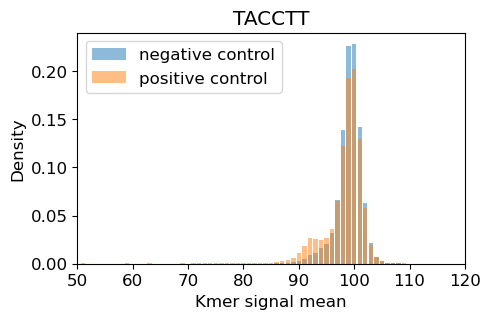

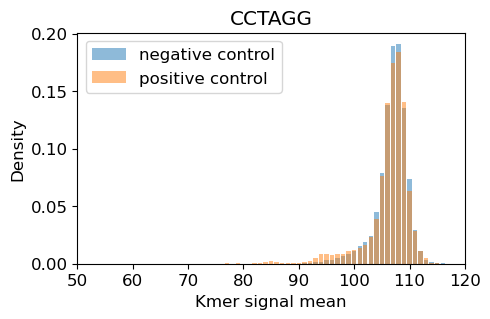

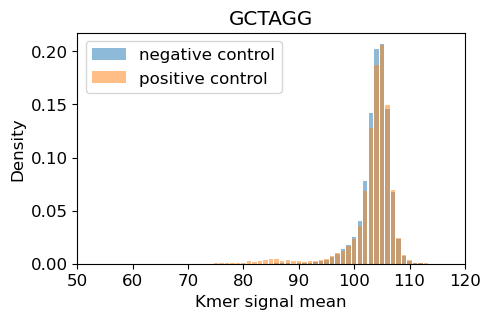

In [127]:
# rescuable TA k-mers
for kmer in nonikmer:
    if 'TA' in kmer:
        pos, neg = kmerpeaks[kmer]
        pospeaks, _ = find_peaks(pos, prominence=0.002, distance=3)
        negpeaks, _ = find_peaks(neg, prominence=0.002, distance=3)
        if len(pospeaks) > len(negpeaks):
            plt.figure(figsize=(5, 3))
            
            # plt.plot([x+25 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks', color='tab:blue')
            # plt.plot([x+25 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks', color='tab:orange')
            plt.bar(range(25,149), neg, width=0.8, label="negative control", alpha=0.5, color='tab:blue')
            plt.bar(range(25, 149), pos, width=0.8, label="positive control", alpha=0.5, color='tab:orange')
            plt.xlim(50, 120)
            plt.xlabel('Kmer signal mean')
            plt.ylabel('Density')
            plt.title(kmer)
            plt.legend()
            plt.show()